# Idiosyncratic Labor Supply and Unemployment
# An exploration of Aiyagari (1994) and Krusell-Smith (1998)

Building on the seminal papers of Aiyagari (1994) adn Krusell-Smith (1998) this notebook explores the joint and separate impact of idiosyncratic labor supply and unemployment on aggregate savings. To this end the notebook first recalls the individual papers and their solutions.

### [Uninsured Idiosyncratic Risk and Aggregate Saving](https://www.jstor.org/stable/2118417?seq=1#metadata_info_tab_contents)
* Author: S. Rao Aiyagari
* Source: The Quaterly Journal of Economics, Vol. 109, No. 3 (Aug., 1994), pp. 659-684

### [Income and Wealth Heterogeneity in the Macroeconomy](https://www.journals.uchicago.edu/doi/pdf/10.1086/250034)
* Author: Per Krusell and Anthony A. Smith, Jr.
* Source:  Journal of Political Economy, Volume 106, Number 5, October 1998


* Notebook by David Osten; drawing on the KrusellSmithHARK0p12 and the Aiyagari1994QJE notebooks

## Overview of Aiyagari (1994)
* The paper expands the standard growth model by precautionary savings motives and liquidity constraints. 
* The paper examines the impact of uninsurable idiosyncratic labor income risk on the aggregate saving rate, the importance of tradable assets for precautionary savings, and the resulting wealth and income distributions. 

### The Goals of the Paper 
* The main goal of the paper is to describe the aggregate dynamics of savings and consumption caused by idiosyncratic and aggregate shocks to labor income, under liquidity constraints. 
* The second goal of the paper is to explore the extent to which capital accumulation is driven by precautionary savings. 

### Structure of Model
* Aiyagari's model builds upon the Brock and Mirman (1972) growth model which it exends with idiosyncratic risk to labor income, and thus creating a heterogeneous agent growth model.
* The resulting precautionary savings in part determine the aggregate capital stock and thus lead to an endogenously wavering interest rate.
* The idiosyncracy of the labor income shocks also generates considerable income and wealth inequality.

### Key features
* Endogenous heterogeneity 
* Aggregation
* Infinite horizons 
* Exogenous borrowing constraint
* General equilibrium. i.e. interest rate is endogenously determined since in a steady state equilibrium the capital per capita must equal the per capita asset holdings of consumers, and the interest rate must equal the net marginal product of capital. 

## Related Literature
* The Aiyagari model is part of the subsequent literature of the Bewley model and in the tradition of e.g. Zeldes (1989), Deaton (1991), Carroll (1992). Its contribution is to offer a general equilibrium for these kinds of models. This strand of the literature is focussing on the following topics:
> * How much of observed wealth inequality is explained by uninsurable idiosyncratic income uncertainty? <br/>
> * What is the fraction of aggregate savings due to precautionary motive? <br/>
> * What are the redistributional implications of various policies?


## Model
### The Individual's Problem

\begin{split}
&\max E_0\left(\sum_{t=0}^\infty \beta^t U(c_t)\right)\\
&\text{s.t.}\\
&c_t+a_{t+1}=wl_{t}+(1+r)a_t \\
&c_t\geq0\\
&a_t\geq-\phi
\end{split}


where $\phi$ is the borrwoing constraint; labor supply $l_t$ is assumed to be i.i.d with bounded support given by $[l_{min},l_{max}]$, with $l_{min}>0$; wages $w$ and interest rate $r$ will be determined endogenously by their respective marginal product. For ease of calculation it will be beneficial to define the following variables:


* $\hat{a}_t\equiv a_t+\phi$ 
* $z_t \equiv wl_t+(1+r)\hat{a}_t-r\phi$: total resources of the agent at date $t$ respectively. 
* Then the Bellman equation can be stated by the following:
$$
\begin{split}
V(z_t,\phi,w,r) \equiv \underset{\hat{a}_{t+1}}{\max}\left(U(z_t-\hat{a}_{t+1})+\beta \int V(z_{t+1},\phi,w,r)\ dF(l_{t+1})  \right)
\end{split}
$$

* Euler equation: 

\begin{split}
U^\prime (z_t-\hat{a}_{t+1})=\beta(1+r)\int U^\prime (z_{t+1}-\hat{a}_{t+2})\ dF(l_{t+1})
\end{split}
where U is assumed to be CRRA utility.

* Decision rule: $\hat{a}_{t+1}=A(z_t,\phi,w,r)$ 
* Law of transition (modeled as a Markov process in this paper): $z_{t+1}=wl_{t+1}+(1+r)A(z_t,\phi,w,r)-r\phi$           

### The Firm's problem
\begin{split}
\max F(K,L)-wL-rK
\end{split}



where $K$ is the aggregate capital, $L$ is the aggregate labor, $F(K,L)$ is the production function.

### General Equilibrium
In the steady state, variables are time invariant and all markets are clear, i.e.,
* $F_K(K,L) = r+\delta $
* $F_L(K,L) = w$
* $\int l_i di = L$
* $\int a_i di = K$

### Model specification and parameters
| Parameter      | Description               | Value           ||
|:------:| ------       | ------    | :------:  |
|$\beta$ | Time Preference Factor | 0.96 | 
| $\delta$ | Depreciation Rate | 0.08 |
| $\alpha$ | Capital Share | 0.36 |
| $\phi$ |     Borrowing Constraint | 0 |
| $\mu$ | Risk Aversion Coefficient | {1,3,5} |
| $\rho$ | Serial Correlation of Labor Shocks | {0,0.3,0.6,0.9} |
| $\sigma$ | Variance of Labor Shocks | {0.2,0.4} |



* Production function: Cobb Douglas with the capital share taken to be $\alpha$
\begin{split}
F(K,L) = K^\alpha L^{1-\alpha}
\end{split}
* Utility function: CRRA with the relative risk aversion coefficient $\mu$
* Labor endowment shocks: 
$$
\begin{split}
\log(l_t)=\rho\log(l_{t-1})+\sigma(1-\rho^2)^{\frac{1}{2}}\epsilon_{t}, \ \epsilon_t \sim N(0,1)   
\end{split}
$$


### Verbal Description of the Code to build:

Consumer has initial assets and receives labor shock (which is autocorrelated). Aiyagari approximates the labor supply with a 7 state Markov Chain using the Tauchen method.

All realized labor which is between $l_{min}$ and $l_{max}$ is aggregated to the aggregate labor supply $L_t$ of the period. This determines per capita capital stock (aggregate assets $A_t / L_t$) and thus the marginal productivity of labor and capital, which in turn determine the wage and interest rate of the period:
r: α*(N/K)^(1-α) - δ
w: (1-α)*(K/N)^(α)

derived from the given Cobb-Douglas production function.
This finally determines the agent's income in period t.

#### calcualte income 
income = $ (r + 0.08) a_t + w l_t $      # depreciation is 8%

Given income of this period and expected income in the future (influenced by the autocorrelation of the labor supply) the agent has to choose optimal consumption and savings.

 c[t] = (1+r[t])*a[t] +  w[t]*exp(e[t]) - i[t]   where i[t] is the choice variable of how much assets the agent wants to save.
 
The asset demand function dependent on total market resources (for each of seven possible current labor endowment shocks) is approximated by a continuous, piece-wise linear function over the market resource grid.

The optimal asset demand (wrt z_t) is derived from the Euler equation: 

\begin{split}
U^\prime (z_t-\hat{a}_{t+1})=\beta(1+r)\int U^\prime (z_{t+1}-\hat{a}_{t+2})\ dF(l_{t+1})
\end{split}
where U is assumed to be CRRA utility.
\begin{split}
(z_t-a_{t+1})^{-\mu}=\beta(1+r)\int (z_{t+1}-a_{t+2})^{-\mu} \ dF(l_{t+1})
\end{split}
where $a_{t+2}$ is the expected assets given the optimal consumption function and the idiosyncratic labor state transition matrix. HTis matrix is derived by an approximation to the labor state Markov Chain by the Tauchen method.

We first calculate the aggregate saving rate under baseline parameters, where $\rho =0.6$, $\mu = 1$, and $\sigma = 0.2$

In [1]:
# Import the plot-figure library matplotlib

import matplotlib.pyplot as plt
import numpy as np

from copy import deepcopy
from HARK.utilities import plot_funcs, plot_funcs_der, make_figs
from HARK.distribution import DiscreteDistribution
import Aiyagari_Support

## 7 State Aiyagari Model
This section presents the baseline implementation of Aiyagari's 1994 model with 7 idiosyncratic labor supply states. In this it uses the KrusellSmithAgent framework from the HARK toolkit, extending it by the latent labor supply states of Aiyagari to incorporate both Krusell-Smith's unemployment and Aiyagari's idiosyncratic labor supply states.

In [2]:
# Import Aiyagari model
from Aiyagari_Support import AiyagariType, AiyagariEconomy   #SimpleAiyagari  <- 2 state version (works)
from time import time
from scipy.stats import linregress

In [3]:
Aiyagari_economy_dictionary = {
    "verbose": True,
    "LaborStatesNo": 7,                                                                                             #!N
    "LaborAR": 0.6,
    "LaborSD": 0.2,     #Aiyagari: either 0.2 or 0.4
    "act_T": 11000,
    "T_discard": 1000,
    "DampingFac": 0.5,
    "intercept_prev": [0.0, 0.0],
    "slope_prev": [1.0, 1.0],
    "DiscFac": 0.96,     #KS value is 0.99     #Aiyagari: 0.96                                                      #!KS
    "CRRA": 1.0,
    "LbrInd": 1.0,  #Alan Lujan got 0.3271 indirectly from KS    #Aiyagari: 1                                       #!KS
    "ProdB": 1.0,     #KS: 0.99                      #Aiyagari:1                                                   #!KS
    "ProdG": 1.0,     # Original KS value is 1.01    #Aiyagari:1                                                   #!KS
    "CapShare": 0.36,
    "DeprFac": 0.08,  # Original KS value is 0.025  # Aiyagari 0.08                                                   #!KS
    "DurMeanB": 8.0,
    "DurMeanG": 8.0,
    "SpellMeanB": 2.5,  #KS:2.5
    "SpellMeanG": 1.5,  #KS:1.5
    "UrateB": 0.0,      #Original KS value 0.10     #Aiyagari: 0.0                                                    #!KS
    "UrateG": 0.0,      #Original KS value 0.04     #Aiyagari: 0.0                                                    #!KS
    "RelProbBG": 0.75,  #0.75
    "RelProbGB": 1.25,  #1.25
    "MrkvNow_init": 0,
}

In [4]:
# Make default Aiyagari agent type and economy
A94economy = AiyagariEconomy(**Aiyagari_economy_dictionary)
A94economy.verbose = False
A94type = AiyagariType()
A94type.cycles = 0
A94type.get_economy_data(A94economy)
A94economy.agents = [A94type]
A94economy.make_Mrkv_history()

In [5]:
# Solve the Aiyagari economy
t0 = time()
print("Now solving for the equilibrium of the 7-State Aiyagari (1994) model.  This might take a few minutes...")
A94economy.solve()
t1 = time()
print('Solving the Aiyagari model took ' + str(t1-t0) + ' seconds.')

Now solving for the equilibrium of the 7-State Aiyagari (1994) model.  This might take a few minutes...
Solving the Aiyagari model took 1021.7287518978119 seconds.


In [6]:
print('Equilibrium Return to Capital:', (A94economy.sow_state['Rnow']-1)*100, '%')
print('Equilibrium Savings Rate:', (np.mean(A94economy.reap_state['aNow'])/A94economy.sow_state['Mnow']))     

Equilibrium Return to Capital: 3.668470374284949 %
Equilibrium Savings Rate: 0.8037782871162574


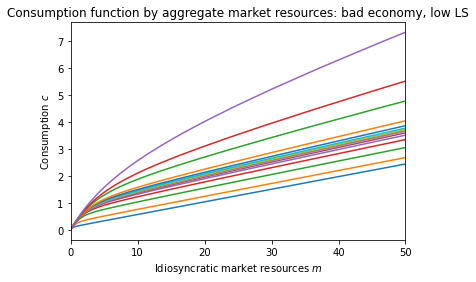

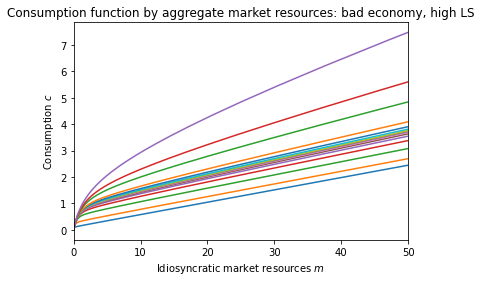

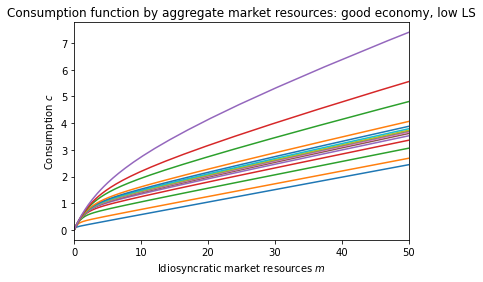

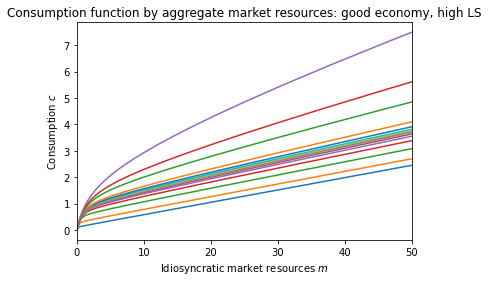

In [7]:
# Plot the consumption function for each discrete state; where LS stands for "Labor Supply"
state_names = ['bad economy, low LS', 'bad economy, high LS',
               'good economy, low LS', 'good economy, high LS']

for j in range(4):
    plt.xlabel(r'Idiosyncratic market resources $m$')
    plt.ylabel(r'Consumption $c$')
    plt.title('Consumption function by aggregate market resources: ' + state_names[j])
    plot_funcs(A94type.solution[0].cFunc[j].xInterpolators, 0., 50.)

In [8]:
# Extract history of aggregate capital and run a serial autoregression
mystr = lambda x : '{:.4f}'.format(x)
mystr2 = lambda x : '{:.7f}'.format(x)
K_hist = np.array(A94economy.history['Aprev'])[A94economy.T_discard:]
Mrkv_hist = A94economy.MrkvNow_hist[A94economy.T_discard:]
bad = Mrkv_hist[:-1] == 0
good = Mrkv_hist[:-1] == 1
logK_t = np.log(K_hist[:-1])
logK_tp1 = np.log(K_hist[1:])
results_bad = linregress(logK_t[bad], logK_tp1[bad])
results_good = linregress(logK_t[good], logK_tp1[good])
print('')
print('Equilibrium dynamics of aggregate capital:')
print("Bad state:  log k' = " + mystr(results_bad[1]) + ' + ' + mystr(results_bad[0]) + ' log k (r-sq = ' +  mystr2(results_bad[2]**2) + ')')
print("Good state: log k' = " + mystr(results_good[1]) + ' + ' + mystr(results_good[0]) + ' log k (r-sq = ' +  mystr2(results_good[2]**2) + ')')


Equilibrium dynamics of aggregate capital:
Bad state:  log k' = 0.0714 + 0.9593 log k (r-sq = 0.9152975)
Good state: log k' = 0.0872 + 0.9504 log k (r-sq = 0.9094391)


Aggregate savings as a function of aggregate market resources:
Saving figure aggregate_savings in ../../Figures


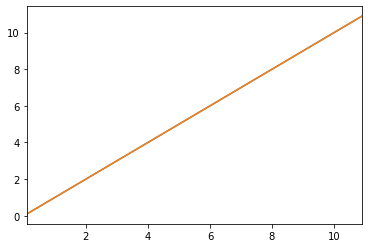

<Figure size 432x288 with 0 Axes>

In [9]:
print('Aggregate savings as a function of aggregate market resources:')
bottom = 0.1
top = 2 * A94economy.KSS
x = np.linspace(bottom, top, 1000, endpoint=True)
y0 = A94economy.AFunc[0](x)
y1 = A94economy.AFunc[1](x)
plt.plot(x, y0)
plt.plot(x, y1)
plt.xlim([bottom, top])
make_figs('aggregate_savings', True, False, '../../Figures')
plt.show()
plt.clf()

In [10]:
#print('SS return on capital:', A94economy.reap_state['Rnow'])
#print('Aggregate Savings Rate:', (A94economy.reap_state['Anow']/A94economy.reap_state['Mnow']))

### The Wealth Distribution of the Aiyagari model

In [11]:
sim_wealth = A94economy.reap_state['aNow'][0]
print('Maximal Wealth:')
print(max(sim_wealth))

print("The mean of individual wealth is "+ str(sim_wealth.mean()) + ";\n the standard deviation is "
      + str(sim_wealth.std())+";\n the median is " + str(np.median(sim_wealth)) +".")

Maximal Wealth:
13.842599866001832
The mean of individual wealth is 5.814513659675145;
 the standard deviation is 2.4970918118114214;
 the median is 5.547294020074046.


In [12]:
# Get some tools for plotting simulated vs actual wealth distributions
from HARK.utilities import get_lorenz_shares, get_percentiles

# The cstwMPC model conveniently has data on the wealth distribution
# from the U.S. Survey of Consumer Finances
from HARK.datasets import load_SCF_wealth_weights
SCF_wealth, SCF_weights = load_SCF_wealth_weights()

Saving figure wealth_distribution_1 in ../../Figures


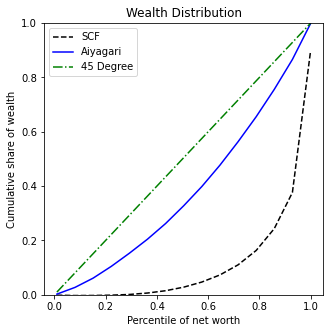

In [13]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.01,0.999,15)
SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)

# Plot
plt.figure(figsize=(5,5))
plt.title('Wealth Distribution')
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Aiyagari')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
make_figs('wealth_distribution_1', True, False, '../../Figures')
plt.show()

In [14]:
# Calculate a measure of the difference between the simulated and empirical distributions
lorenz_distance = np.sqrt(np.sum((SCF_Lorenz_points - sim_Lorenz_points)**2))
print("The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is "+str(lorenz_distance) )

The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is 1.2146820837809247


### Comments on the Aiyagari model:
* The results from the above replication of the Aiyagari (1994) model delivers an incredible savings rate of above 80% (this might be a bug), and a steady state rate of capital returns of roughly 3.6%, which is slightly lower than Aiyagari's 4.09%
* The Aiyagari model extends the Bewley model to a context with a production sector. It differs from the representative agent model in which complete market are implicitly assumed, it studies the aggregate saving behavior of the economy with the agents facing an uninsured idiosyncratic labor supply risk. With an empirically plausible set of parameters, it finds that the aggregate saving rate does increase compared to the case with a complete market. Furthermore, the results of the model qualitatively match the real data in terms of the ranking of the fluctuations of some economic variables. However, in terms of approaching the real inequalities of income and wealth shown by the data, the model does not perform very well (too little inequality). Also, in this model, the joint distribution of income and wealth is not treated as a state variable, which neglects the distribution effect Krusell and Smith(1998) address.

### Results from the original Aiyagari Paper:


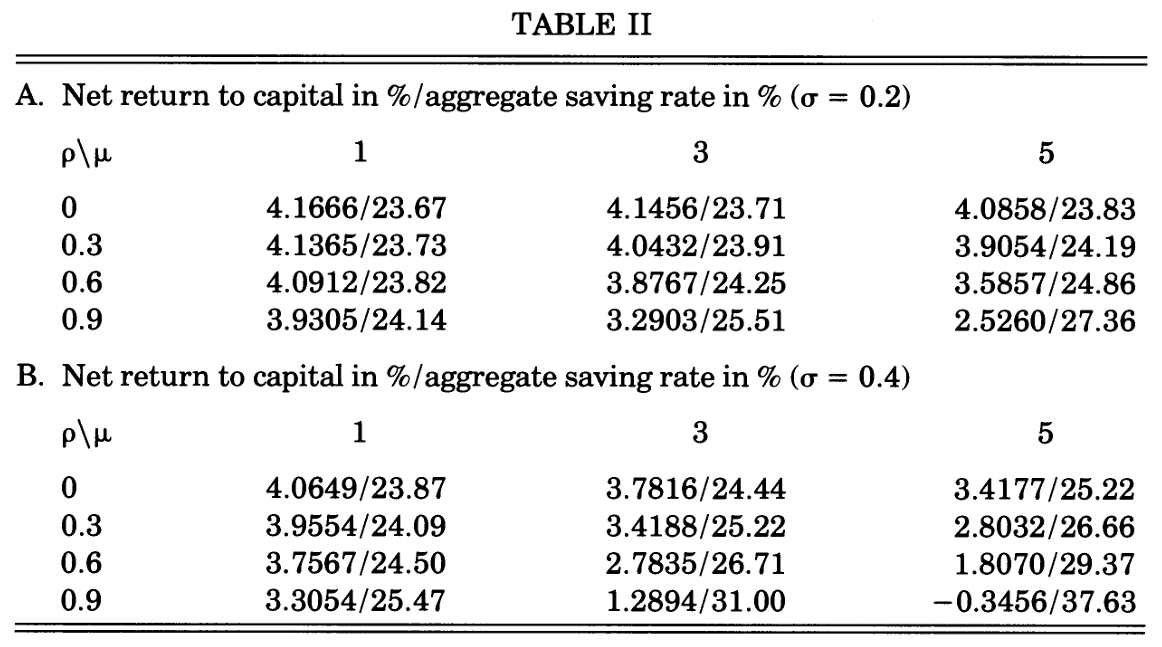



## Overview of Krusell Smith (1998):
I took the liberty of borrowing the essential parts of the Krusell-Smith Notebook in Hark, to remind the reader of the Krusell-Smith model, and to compare its "New and Improved Krusell-Smith" model with the integrated Aiyagari/Krusell-Smith models in the later sections.


The benchmark Krusell-Smith model has the following broad features:
   * The aggregate state switches between "good" and "bad" with known probabilities
   * All consumers experience the same aggregate state for the economy (good or bad)
   * _ex ante_ there is only one type of consumer, which is infinitely lived
   * _ex post_ heterogeneity arises from uninsurable idiosyncratic income shocks
      * Specifically, individuals are at risk of spells of unemployment
      * In a spell of unemployment, their income is zero
   
Thus, each agent faces two types of uncertainty: About their employment state, and about the income they will earn when employed.  And the values of income and unemployment risk depend on the aggregate state.

#### Details

##### Idiosyncratic
Each agent _attempts_ to supply an amount of productive labor $\ell$ in each period.  (Here and below we mostly follow the notation of Krusell and Smith (1998)).

However, whether they _succeed_ in supplying that labor (and earning a corresponding wage) is governed by the realization of the stochastic variable $\epsilon$.  If the agent is unlucky, $\epsilon$ is zero and the agent is unemployed.  The amount of labor they succeed in supplying is thus $\epsilon\ell$.

##### Aggregate
Aggregate output ($\bar{y}$) is produced using a Cobb-Douglas production function using capital and labor. (Bars over variables indicate the aggregate value of a variable that has different values across different idiosyncratic consumers).

$z$ denotes the aggregate shock to productivity. $z$ can take two values, either $z_g$ -- the "good" state, or $z_b < z_g$ -- the "bad" state.  Consumers gain income from providing labor, and from the rental return on any capital they own.  Labor and capital markets are perfectly efficient so both factors are both paid their marginal products.

The agent can choose to save by buying capital $k$ which is bounded below at the borrowing constraint of 0.


Putting all of this together, aggregate output is given by: 
\begin{eqnarray}
\bar{y} & = & z\bar{k}^\alpha \bar{\ell}^{1-\alpha}
\end{eqnarray}

The aggregate shocks $z$ follow first-order Markov chains with the transition probability of moving from state $s$ to state $s'$ denoted by $\pi_{ss'}$. The aggregate shocks and individual shocks are correlated: The probability of being unemployed is higher in bad times, when aggregate productivity is low, than in good times, when aggregate productivity is high.

##### Idiosyncratic and Aggregate Together

The individual shocks satisfy the law of large numbers, and the model is constructed so that the number of agents who are unemployed in the good state always equals $u_g$, and is always $u_b$ in the bad state. Given the aggregate state, individual shocks are independent from each other.

For the individual, the probability of moving between a good state and employment to a bad state and unemployment is denoted $\pi_{gb10}$ with similar notation for the other transition probabilities.

(Krusell and Smith allow for serially correlated unemployment at the idiosyncratic level. Here we will simplify this and have unemployment be serially uncorrelated.)

Finally, $\Gamma$ denotes the current distribution of consumers over capital and employment status, and $H$ denotes the law of motion of this distribution. 

##### The Idiosyncratic Individual's Problem Given the Aggregate State

The individual's problem is:
\begin{eqnarray*}
V(k, \epsilon; \Gamma, z) &=& \max_{k'}\{U(c) + \beta \mathbb{E}[V(k' ,\epsilon'; \Gamma', z')|z, \epsilon]\} \\
c + k' &=& r(\bar{k}, \bar{\ell}, z)k + w(\bar{k}, \bar{\ell}, z)\ell\epsilon + (1-\delta)k \\
\Gamma' &=& H(\Gamma, z, z') \\
k' &\geq& 0 \\
\end{eqnarray*}

Krusell and Smith define an equilibrium as a law of motion $H$, a value function $V$, a rule for updating capital $f$ and pricing functions $r$ and $w$, such that $V$ and $f$ solve the consumers problem, $r$ and $w$ denote the marginal products of capital and labour, and $H$ is consistent with $f$ (i.e. if we add up all of the individual agents capital choices we get the correct distribution of capital).


##### Discussion of the KS Algorithm

In principle, $\Gamma$ is a high-dimensional object because it includes the whole distribution of individuals' wealth and employment states. Because the optimal amount to save is a nonlinear function of the level of idiosyncratic $k$, next period's aggregate capital stock $\bar{k}'$ depends on the distribution of the holdings of idiosyncratic $k$ across the population of consumers. Therefore the law of motion $H$ is not a trivial function of the $\Gamma$. 

KS simplified this problem by noting the following. 

1. The agent cares about the future aggregate aggregate state only insofar as that state affects their own personal value of $c$
1. Future values of $c$ depend on the aggregate state only through the budget constraint
1. The channels by which the budget constraint depends on the aggregate state are:
   * The probability distributions of $\epsilon$ and $z$ are affected by the aggregate state
   * Interest rates and wages depend on the future values of $\bar{k}$ and $\bar{\ell}$
1. The probability distributions for the future values of $\{\epsilon, z\}$ are known
   * They are fully determined by the Markov transition matrices
1. But the values of $r$ and $w$ are both determined by the future value of $\bar{k}$ (in combination with the exogenous value of $\bar{\ell}$)
   * So the only _endogenous_ object that the agent needs to form expectations about, in order to have a complete rational expectation about everything affecting them, is $\bar{k}'$

The key result in Krusell and Smith is the discovery that a very simple linear rule does an extraordinarily good job (though not quite perfect) in forecasting $\bar{k'}$

They then argue that, since rationality is surely bounded to some degree, the solution that an agent obtains using a good forecasting rule for $\bar{k}'$ is "good enough" to compute an "approximate" solution to the consumer's optimization problem.

They define a generic algorithm to find a forecasting rule for $\bar{k}$ as follows

1. Choose the number of moments $n$ of the distribution of $k$ to be included in the set of variables to forecast $\bar{k}'$. In the simplest case, $n=1$, the only forecasting variable for next period's $\bar{k}'$ is the mean (the first moment, $n=1$)) of current capital, $\bar{k}$.
2. Each individual adopts the same belief about the law motion of these moments, $H_I$ and finds the optimal decision policy, $f_I$, contingent on that guess.
3. Use the optimal policy to simulate a history of aggregate capital with a large number of agents. 
4. Characterize the realized law of motion using the same number of moments $n$ 
5. Compare it with the $H_I$, what is taken as given by individuals. 
6. Iterate until the two converge. 

In the end, the solution to the original problem is well approximated by the following simplified problem:

\begin{eqnarray*}
V(k, \epsilon; \bar k, z) &=& max_{c, k'}\{U(c) + \beta E[V(k' ,\epsilon'; \bar k', z')|z, \epsilon]\} \\
c + k' &=& r(\bar{k}, \bar{\ell}, z)k + w(\bar{k}, \bar{\ell}, z)l\epsilon + (1-\delta)k \\
\text{When }~ z=z_g, \quad \mathbb{E}[\log\bar{k}'] & = & a_0 + a_1 \log\bar k \\
\text{When }~ z=z_b,  \quad \mathbb{E}[\log\bar{k}'] & = & b_0 + b_1 \log\bar k \\
k' &\geq& 0 \\
\end{eqnarray*}

## Krusell-Smith Model Implementation


In [15]:
# Import Krusell-Smith model
from HARK.ConsumptionSaving.ConsAggShockModel import KrusellSmithType, KrusellSmithEconomy
from time import time
from scipy.stats import linregress

In [16]:
# Make default KS agent type and economy
KSeconomy = KrusellSmithEconomy()
KSeconomy.verbose = False
KStype = KrusellSmithType()
KStype.cycles = 0
KStype.get_economy_data(KSeconomy)
KSeconomy.agents = [KStype]
KSeconomy.make_Mrkv_history()

In [ ]:
# Solve the Krusell-Smith economy
t0 = time()
print("Now solving for the equilibrium of the Krusell-Smith (1998) model.  This might take a few minutes...")
KSeconomy.solve()
t1 = time()
print('Solving the Krusell-Smith model took ' + str(t1-t0) + ' seconds.')

Now solving for the equilibrium of the Krusell-Smith (1998) model.  This might take a few minutes...


In [ ]:
print('Equilibrium Return to Capital:', (KSeconomy.sow_state['Rnow']-1)*100, '%')
print('Equilibrium Savings Rate:', (np.mean(KSeconomy.reap_state['aNow'])/KSeconomy.sow_state['Mnow']))     

In [ ]:
# Plot the consumption function for each discrete state
state_names = ['bad economy, unemployed', 'bad economy, employed',
               'good economy, unemployed', 'good economy, employed']

for j in range(4):
    plt.xlabel(r'Idiosyncratic market resources $m$')
    plt.ylabel(r'Consumption $c$')
    plt.title('Consumption function by aggregate market resources: ' + state_names[j])
    plot_funcs(KStype.solution[0].cFunc[j].xInterpolators, 0., 50.)

In [ ]:
# Extract history of aggregate capital and run a serial autoregression
mystr = lambda x : '{:.4f}'.format(x)
mystr2 = lambda x : '{:.7f}'.format(x)
K_hist = np.array(KSeconomy.history['Aprev'])[KSeconomy.T_discard:]
Mrkv_hist = KSeconomy.MrkvNow_hist[KSeconomy.T_discard:]
bad = Mrkv_hist[:-1] == 0
good = Mrkv_hist[:-1] == 1
logK_t = np.log(K_hist[:-1])
logK_tp1 = np.log(K_hist[1:])
results_bad = linregress(logK_t[bad], logK_tp1[bad])
results_good = linregress(logK_t[good], logK_tp1[good])
print('')
print('Equilibrium dynamics of aggregate capital:')
print("Bad state:  log k' = " + mystr(results_bad[1]) + ' + ' + mystr(results_bad[0]) + ' log k (r-sq = ' +  mystr2(results_bad[2]**2) + ')')
print("Good state: log k' = " + mystr(results_good[1]) + ' + ' + mystr(results_good[0]) + ' log k (r-sq = ' +  mystr2(results_good[2]**2) + ')')
print('')
print("Krusell & Smith's published results (p877):")
print("Bad state:  log k' = 0.085 + 0.965 log k (r-sq = 0.999998)")
print("Good state: log k' = 0.095 + 0.962 log k (r-sq = 0.999998)")

### The Wealth Distribution of the Krusell-Smith model

In [ ]:
sim_wealth = KSeconomy.reap_state['aNow'][0]
print('Maximal Wealth:')
print(max(sim_wealth))

print("The mean of individual wealth is "+ str(sim_wealth.mean()) + ";\n the standard deviation is "
      + str(sim_wealth.std())+";\n the median is " + str(np.median(sim_wealth)) +".")

In [ ]:
# Get some tools for plotting simulated vs actual wealth distributions
from HARK.utilities import get_lorenz_shares, get_percentiles

# The cstwMPC model conveniently has data on the wealth distribution
# from the U.S. Survey of Consumer Finances
from HARK.datasets import load_SCF_wealth_weights
SCF_wealth, SCF_weights = load_SCF_wealth_weights()

In [ ]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.01,0.999,15)
SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)

# Plot
plt.figure(figsize=(5,5))
plt.title('Wealth Distribution')
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Krusell-Smith')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
make_figs('wealth_distribution_1', True, False, '../../Figures')
plt.show()

In [ ]:
# Calculate a measure of the difference between the simulated and empirical distributions
lorenz_distance = np.sqrt(np.sum((SCF_Lorenz_points - sim_Lorenz_points)**2))
print("The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is "+str(lorenz_distance) )

## 7 State Aiyagari/Krusell-Smith Model

This model now incorporates both idiosyncratic risk of unemployment of which the likelihood depends on the aggregate state of the economy (Krusell Smith 1998), and idiosyncratic labor supply shocks as used by Aiyagari (1994).

### Aiyagari type extension:
Building up on the KS model above, this model includes the Aiyagari type idiosyncratic labor supply states. Thus, regardless of being employed or unemployed there will be a latent labor supply for each agent, which is continued to be described by Aiyagari's AR1 labor endowment shock process:

$$
\begin{split}
\log(l_t)=\rho\log(l_{t-1})+\sigma(1-\rho^2)^{\frac{1}{2}}\epsilon_{t}, \ \epsilon_t \sim N(0,1)   
\end{split}
$$

In this subsection there will only be two idiosyncratic labor supply states, thus leading to 8 overall individual states in the model. The idiosyncratic labor supply markov chain will again be approximated via the Tauchen method.

This code has been written in a modular fashion, such that the idiosyncratic labor states can be turned off and the model reverts back to the Krusell-Smith (1998) model. Unfortunately, this involves more than just changing variable values. For ease I commented the lines in the HARK.ConsumptionSaving.ConsAggShockModel with "#!KS" and wrote the necessary changes in commented out form for the reader to copy and paste in. The 7-State Aiyagari can be retrieved by setting the unemployment rates to zero and the aggregate state productivities to 1 in the Aiyagari_Economy dictionary in HARK.ConsumptionSaving.ConsAggShockModel, and check that all the variable values are corresponding to the values the reader wants to test (the baseline Aiyagari values should already be set). All these varables that need adaption between the KS, Aiyagari and the hybrid model are also marked with "#!KS". 

Furthermore, in the case the reader would like to adapt the number of idiosyncratic labor supply states, I marked the necessary changes with "#!N", and explained the structure of the corresponding code, so that an adaptation of these states should be fairly easy.

In [ ]:
# Import Aiyagari model
from Aiyagari_Support import AiyagariType, AiyagariEconomy   
from time import time
from scipy.stats import linregress

In [ ]:
Aiyagari_economy_dictionary = {
    "verbose": True,
    "LaborStatesNo": 7,                                                                                             #!N
    "LaborAR": 0.6,
    "LaborSD": 0.2,     #Aiyagari: either 0.2 or 0.4
    "act_T": 11000,
    "T_discard": 1000,
    "DampingFac": 0.5,
    "intercept_prev": [0.0, 0.0],
    "slope_prev": [1.0, 1.0],
    "DiscFac": 0.96,     #KS value is 0.99     #Aiyagari: 0.96                                                      #!KS
    "CRRA": 1.0,
    "LbrInd": 1.0,  #Alan Lujan got 0.3271 indirectly from KS    #Aiyagari: 1                                       #!KS
    "ProdB": 0.99,     #KS: 0.99                      #Aiyagari:1                                                   #!KS
    "ProdG": 1.01,     # Original KS value is 1.01    #Aiyagari:1                                                   #!KS
    "CapShare": 0.36,
    "DeprFac": 0.08,  # Original KS value is 0.025  # Aiyagari 0.08                                                   #!KS
    "DurMeanB": 8.0,
    "DurMeanG": 8.0,
    "SpellMeanB": 2.5,  #KS:2.5
    "SpellMeanG": 1.5,  #KS:1.5
    "UrateB": 0.10,      #Original KS value 0.10     #Aiyagari: 0.0                                                    #!KS
    "UrateG": 0.04,      #Original KS value 0.04     #Aiyagari: 0.0                                                    #!KS
    "RelProbBG": 0.75,  #0.75
    "RelProbGB": 1.25,  #1.25
    "MrkvNow_init": 0,
}

In [ ]:
# Make default Aiyagari agent type and economy
A94economy = AiyagariEconomy()
A94economy.verbose = False
A94type = AiyagariType()
A94type.cycles = 0
A94type.get_economy_data(A94economy)
A94economy.agents = [A94type]
A94economy.make_Mrkv_history()

In [ ]:
# Solve the Aiyagari economy
t0 = time()
print("Now solving for the equilibrium of the Aiyagari/Krusell-Smith model.  This might take a few minutes...")
A94economy.solve()
t1 = time()
print('Solving the Aiyagari model took ' + str(t1-t0) + ' seconds.')

In [ ]:
print('Equilibrium Return to Capital:', (A94economy.sow_state['Rnow']-1)*100, '%')
print('Equilibrium Savings Rate:', (np.mean(A94economy.reap_state['aNow'])/A94economy.sow_state['Mnow']))     

In [ ]:
# Plot the consumption function for each discrete state
state_names = ['bad economy, unemployed, LS1', 'bad economy, employed, LS1',
               'good economy, unemployed, LS1', 'good economy, employed, LS1',
               'bad economy, unemployed, LS2', 'bad economy, employed, LS2',
               'good economy, unemployed, LS2', 'good economy, employed, LS2',
               'bad economy, unemployed, LS3', 'bad economy, employed, LS3',
               'good economy, unemployed, LS3', 'good economy, employed, LS3',
               'bad economy, unemployed, LS4', 'bad economy, employed, LS4',
               'good economy, unemployed, LS4', 'good economy, employed, LS4',
              'bad economy, unemployed, LS5', 'bad economy, employed, LS5',
               'good economy, unemployed, LS5', 'good economy, employed, LS5',
               'bad economy, unemployed, LS6', 'bad economy, employed, LS6',
               'good economy, unemployed, LS6', 'good economy, employed, LS6',
              'bad economy, unemployed, LS7', 'bad economy, employed, LS7',
               'good economy, unemployed, LS7', 'good economy, employed, LS7']

for j in [0,14,27]:
    plt.xlabel(r'Idiosyncratic market resources $m$')
    plt.ylabel(r'Consumption $c$')
    plt.title('CFunc by Agg. market resources: ' + state_names[j])
    plot_funcs(A94type.solution[0].cFunc[j].xInterpolators, 0., 50.)

In [ ]:
# Extract history of aggregate capital and run a serial autoregression
mystr = lambda x : '{:.4f}'.format(x)
mystr2 = lambda x : '{:.7f}'.format(x)
K_hist = np.array(A94economy.history['Aprev'])[A94economy.T_discard:]
Mrkv_hist = A94economy.MrkvNow_hist[A94economy.T_discard:]
bad = Mrkv_hist[:-1] == 0
good = Mrkv_hist[:-1] == 1
logK_t = np.log(K_hist[:-1])
logK_tp1 = np.log(K_hist[1:])
results_bad = linregress(logK_t[bad], logK_tp1[bad])
results_good = linregress(logK_t[good], logK_tp1[good])
print('')
print('Equilibrium dynamics of aggregate capital:')
print("Bad state:  log k' = " + mystr(results_bad[1]) + ' + ' + mystr(results_bad[0]) + ' log k (r-sq = ' +  mystr2(results_bad[2]**2) + ')')
print("Good state: log k' = " + mystr(results_good[1]) + ' + ' + mystr(results_good[0]) + ' log k (r-sq = ' +  mystr2(results_good[2]**2) + ')')
print('')
print("For Comparison: KS's published results (p 877):")
print("Bad state:  log k' = 0.085 + 0.965 log k (r-sq = 0.999998)")
print("Good state: log k' = 0.095 + 0.962 log k (r-sq = 0.999998)")


print('Savings at each individual market resources gridpoint (in general equilibrium):')
A94type.unpack('cFunc')
m_grid = np.linspace(0,10,200)
A94type.unpack('cFunc')
for M in A94type.Mgrid:
    s_at_this_M = m_grid-A94type.solution[0].cFunc[1](m_grid,M*np.ones_like(m_grid))
    c_at_this_M = A94type.solution[0].cFunc[1](m_grid,M*np.ones_like(m_grid))
    plt.plot(m_grid,s_at_this_M)
make_figs('savings_function', True, False, '../../Figures')
plt.show()
#

### The Wealth Distribution in the Aiyagari/Krusell-Smith model


In [ ]:
sim_wealth = A94economy.reap_state['aNow'][0]
print('Maximal Wealth:')
print(max(sim_wealth))

print("The mean of individual wealth is "+ str(sim_wealth.mean()) + ";\n the standard deviation is "
      + str(sim_wealth.std())+";\n the median is " + str(np.median(sim_wealth)) +".")

In [ ]:
# Get some tools for plotting simulated vs actual wealth distributions
from HARK.utilities import get_lorenz_shares, get_percentiles

# The cstwMPC model conveniently has data on the wealth distribution
# from the U.S. Survey of Consumer Finances
from HARK.datasets import load_SCF_wealth_weights
SCF_wealth, SCF_weights = load_SCF_wealth_weights()

In [ ]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.01,0.999,15)
SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)

# Plot
plt.figure(figsize=(5,5))
plt.title('Wealth Distribution')
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Aiyagari 1994')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
make_figs('wealth_distribution_1', True, False, '../../Figures')
plt.show()

In [ ]:
# Calculate a measure of the difference between the simulated and empirical distributions
lorenz_distance = np.sqrt(np.sum((SCF_Lorenz_points - sim_Lorenz_points)**2))
print("The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is "+str(lorenz_distance) )

### Conclusion:
Mixing the idiosyncratic labor supply states of Aiyagari with the idiosyncratic unemployment probability of Krusell-Smith helps close part of the unexplained inequality gap, between the predicitons of the model and real world inequality. However, even when combined, the two mechanism produce inequality levels that are much smaller than in the real world.

There must be another mechanism beyond idiosyncratic income risks that drives inequality in the real world, such as skill heterogeneity, differences in the return to capital (stock market vs. bank account) and/or bequests. Another potential explanation is the potential difference in discounting the future, which will be explored in he next section (work in progress).

### To be worked in:

#### Heterogeneous Time Preference Rates

As the figures show, the distribution of wealth that the baseline KS model produces is very far from matching the empirical degree of inequality in the US data.

This could matter for macroeconomic purposes.  For example, the SCF data indicate that many agents are concentrated at low values of wealth where the MPC is very large.  We might expect, therefore, that a fiscal policy "stimulus" that gives a fixed amount of money to every agent would have a large effect on the consumption of the low-wealth households who have a high Marginal Propensity to Consume.

Krusell-Smith (1998) attempts to address this problem by assuming that an individual agent's time preference rate can change over time.

The rationale is that this represents a generational transition: The "agent" is really a "dynasty" and the time preference rate of the "child" dynast may differ from that of the "parent".

Specifically, Krusell-Smith assume that $\beta$ can take on three values, 0.9858, 0.9894, and 0.9930, and that the transition probabilities are such that 
- The invariant distribution for $\beta$’s has 80 percent of the population at the middle $\beta$ and 10 percent at each of the other $\beta$’s.
- Immediate transitions between the extreme values of $\beta$ occur with probability zero. 
- The average duration of the highest and lowest $\beta$’s is 50 years. 

The HARK toolkit is not natively set up to accommodate stochastic time preference factors.  

Here, instead, we assume that different agents have different values of $\beta$ that are uniformly distributed over some range. We approximate the uniform distribution by three points.  The agents are heterogeneous _ex ante_ (and permanently).

In [ ]:
# Construct the distribution of types
# from HARK.distribution import Uniform
#
#
# # Specify the distribution of the discount factor
# num_types = 3              # number of types we want;
# DiscFac_mean   = 0.9858    # center of beta distribution
# DiscFac_spread = 0.0085    # spread of beta distribution
# DiscFac_dstn = Uniform(bot=DiscFac_mean-DiscFac_spread, top=DiscFac_mean+DiscFac_spread).approx(num_types).X
#
# BaselineType = deepcopy(A94type)
#
# MyTypes = [] # initialize an empty list to hold our consumer types
# for nn in range(len(DiscFac_dstn)):
#     # Now create the types, and append them to the list MyTypes
#     NewType = deepcopy(BaselineType)
#     NewType.DiscFac = DiscFac_dstn[nn]
#     NewType.seed = nn # give each consumer type a different RNG seed
#     MyTypes.append(NewType)
#
# A94economyDictionary= {
#     "verbose": True,
#     "LaborStatesNo": 2,
#     "LaborAR": 0.6,
#     "LaborSD": 0.3,
#     "act_T": 11000,
#     "T_discard": 1000,
#     "DampingFac": 0.5,
#     "intercept_prev": [0.0, 0.0],
#     "slope_prev": [1.0, 1.0],
#     "DiscFac": 0.96,     # Original KS value is 0.99
#     "CRRA": 1.0,
#     "LbrInd": 1.0,  #! Not listed in KS (1998), but Alan Lujan got 0.3271 indirectly from KS
#     "ProdB": 1.0,     # Original KS value is 0.99
#     "ProdG": 1.0,     # Original KS value is 1.01
#     "CapShare": 0.36,
#     "DeprFac": 0.08,  # Original KS value is 0.025
#     "DurMeanB": 8.0,
#     "DurMeanG": 8.0,
#     "SpellMeanB": 2.5,
#     "SpellMeanG": 1.5,
#     "UrateB": 0.0,      #Original KS value 0.10
#     "UrateG": 0.0,      #Original KS value 0.04
#     "RelProbBG": 0.75,
#     "RelProbGB": 1.25,
#     "MrkvNow_init": 1,
# }
#
#
# # %% code_folding=[]
# # Put all agents into the economy
# A94economy_sim = AiyagariEconomy(agents = MyTypes, **A94economyDictionary)
# #A94economy_sim.AggShkDstn = AiyagariAggShkDstn # Agg shocks are the same as defined earlier
#
# for ThisType in MyTypes:
#     ThisType.get_economy_data(A94economy_sim) # Makes attributes of the economy, attributes of the agent
#
# A94economy_sim.make_AggShkHist() # Make a simulated prehistory of the economy
# A94economy_sim.solve()          # Solve macro problem by getting a fixed point dynamic rule
#
# # %% code_folding=[]
# # Get the level of end-of-period assets a for all types of consumers
# aLvl_all = np.concatenate([A94economy_sim.reap_state['aLvl'][i] for i in range(len(MyTypes))])
#
# print('Aggregate capital to income ratio is ' + str(np.mean(aLvl_all)))
#
# # %% code_folding=[]
# # Plot the distribution of wealth across all agent types
# sim_3beta_wealth = aLvl_all
# pctiles = np.linspace(0.001,0.999,15)
# sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)
# SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
# sim_3beta_Lorenz_points = get_lorenz_shares(sim_3beta_wealth,percentiles=pctiles)
#
# ## Plot
# plt.figure(figsize=(5,5))
# plt.title('Wealth Distribution')
# plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
# plt.plot(pctiles,sim_Lorenz_points,'-b',label='Benchmark KS')
# plt.plot(pctiles,sim_3beta_Lorenz_points,'-*r',label='3 Types')
# plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
# plt.xlabel('Percentile of net worth')
# plt.ylabel('Cumulative share of wealth')
# plt.legend(loc=2)
# plt.ylim([0,1])
# make_figs('wealth_distribution_2', True, False, '../../Figures')
# plt.show()
#
# # %% code_folding=[]
# # The mean levels of wealth for the three types of consumer are
# [np.mean(AiyagriEconomy_sim.reap_state['aLvl'][0]),np.mean(KSEconomy_sim.reap_state['aLvl'][1]),np.mean(A94economy_sim.reap_state['aLvl'][2])]
#
# # %% code_folding=[]
# # Plot the distribution of wealth
# for i in range(len(MyTypes)):
#     if i<=2:
#         plt.hist(np.log(A94economy_sim.reap_state['aLvl'][i])\
#                  ,label=r'$\beta$='+str(round(DiscFac_dstn[i],4))\
#                  ,bins=np.arange(-2.,np.log(max(aLvl_all)),0.05))
#         plt.yticks([])
# plt.legend(loc=2)
# plt.title('Log Wealth Distribution of 3 Types')
# make_figs('log_wealth_3_types', True, False, '../../Figures')
# plt.show()
#
# # %% code_folding=[]
# # Distribution of wealth in original model with one type
# plt.hist(np.log(sim_wealth),bins=np.arange(-2.,np.log(max(aLvl_all)),0.05))
# plt.yticks([])
# plt.title('Log Wealth Distribution of Original Model with One Type')
# make_figs('log_wealth_1', True, False, '../../Figures')
# plt.show()
#
# # %% [markdown]
# # ### Target Wealth is Nonlinear in Time Preference Rate
# #
# # Note the nonlinear relationship between wealth and time preference in the economy with three types.  Although the three groups are uniformly spaced in $\beta$ values, there is a lot of overlap in the distribution of wealth of the two impatient types, who are both separated from the most patient type by a large gap.
# #
# # A model of buffer stock saving that has simplified enough to be [tractable](http://econ.jhu.edu/people/ccarroll/public/lecturenotes/Consumption/TractableBufferStock) yields some insight.  If $\sigma$ is a measure of income risk, $r$ is the interest rate, and $\theta$ is the time preference rate, then for an 'impatient' consumer (for whom $\theta > r$), in the logarithmic utility case an approximate formula for the target level of wealth is:
# #
# # <!-- Search for 'an approximation to target market resources' and note that a=m-1, and \gamma=0 -->
# #
# # \begin{eqnarray}
# #  a & \approx & \left(\frac{1}{ \theta(1+(\theta-r)/\sigma)-r}\right)
# # \end{eqnarray}
# #
# # Conceptually, this reflects the fact that the only reason any of these agents holds positive wealth is the precautionary motive.  (If there is no uncertainty, $\sigma=0$ and thus $a=0$).
# #
# # For positive uncertainty $\sigma>0$, as the degree of impatience (given by $\theta-r$) approaches zero, the target level of wealth approaches infinity.
# #
# # A plot of $a$ as a function of $\theta$ for a particular parameterization is shown below.
#
# # %% code_folding=[]
# # Plot target wealth as a function of time preference rate for calibrated tractable model
# fig = plt.figure()
# ax  = plt.axes()
# sigma = 0.01
# r = 0.02
# theta = np.linspace(0.023,0.10,100)
# plt.plot(theta,1/(theta*(1+(theta-r)/sigma)-r))
# plt.xlabel(r'$\theta$')
# plt.ylabel('Target wealth')
# make_figs('target_wealth', True, False, '../../Figures')
# plt.show()